In [ ]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import os, math


2025-11-07 23:04:17.860170: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
print("gpu available:", tf.config.list_physical_devices('GPU'))

gpu available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
 
#images and labels folder:
thisProjectDir= "/Users/lucafaraldi/Documents/projects/leiden/introductionToDeepLearning/ex1/deep_learning_1" + os.sep
 
data_path = os.path.join(thisProjectDir, "images.npy")
labels_path = os.path.join(thisProjectDir,"labels.npy")
data_mm = np.load(data_path, mmap_mode='r')
labels_mm = np.load(labels_path, mmap_mode='r')
total_size = data_mm.shape[0]
train_size = int(0.8 * total_size)
val_size = int(0.1 * total_size)
test_size = total_size - train_size - val_size



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 150, 150, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 150, 150, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 150, 150, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 150, 150, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 150, 150, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 75, 75, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 75, 75, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 75, 75, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 75, 75, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 175232)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │    89,719,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 90,114,244 (343.76 MB)

 Trainable params: 90,112,452 (343.75 MB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/100


2025-11-07 22:35:41.411383: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2909', 8 bytes spill stores, 8 bytes spill loads

2025-11-07 22:35:42.199996: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3529', 10348 bytes spill stores, 10632 bytes spill loads



112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - loss: 0.7818 - mae: 0.7174

2025-11-07 22:36:04.849878: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-07 22:36:05.043780: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2909', 8 bytes spill stores, 8 bytes spill loads

2025-11-07 22:36:05.493662: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3546', 64 bytes spill stores, 64 bytes spill loads



113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - loss: 0.7805 - mae: 0.7167

2025-11-07 22:36:08.323642: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_186', 12 bytes spill stores, 12 bytes spill loads



113/113 ━━━━━━━━━━━━━━━━━━━━ 31s 226ms/step - loss: 0.6370 - mae: 0.6425 - val_loss: 0.9001 - val_mae: 0.7705 - learning_rate: 0.0010
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 184ms/step - loss: 0.3868 - mae: 0.4910 - val_loss: 0.5332 - val_mae: 0.6477 - learning_rate: 0.0010
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 185ms/step - loss: 0.2938 - mae: 0.4350 - val_loss: 0.5140 - val_mae: 0.6416 - learning_rate: 0.0010
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 182ms/step - loss: 0.2221 - mae: 0.3712 - val_loss: 0.6320 - val_mae: 0.6791 - learning_rate: 0.0010
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 183ms/step - loss: 0.1554 - mae: 0.3002 - val_loss: 0.7486 - val_mae: 0.7171 - learning_rate: 0.0010
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 185ms/step - loss: 0.1096 - mae: 0.2477 - val_loss: 0.2350 - val_mae: 0.3963 - learning_rate: 0.0010
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 182ms/step - loss: 0.0890 - mae: 0.2227 - val_loss: 0.6500 - val_mae: 0.6139 - learning_rat

2025-11-07 22:59:36.323243: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


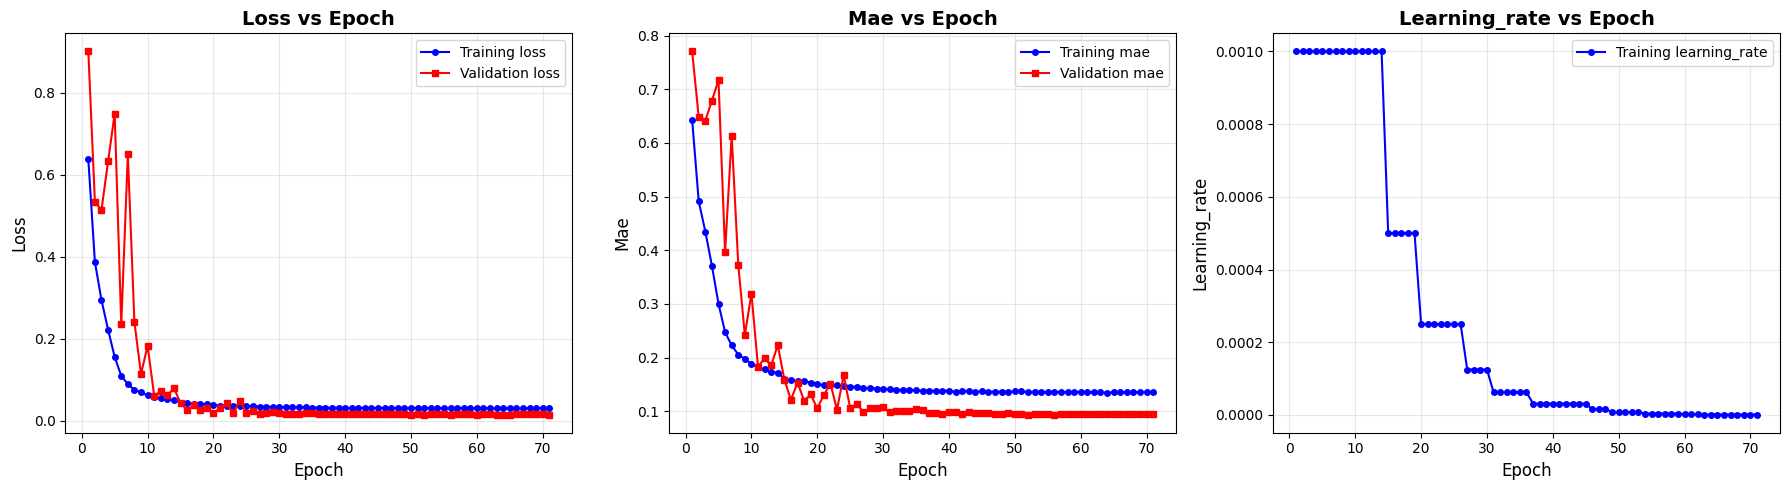

In [ ]:




IMG_HEIGHT, IMG_WIDTH = 150, 150
EPOCHS = 100
BATCH_SIZE = 128

total_size = len(np.load(labels_path, mmap_mode='r'))

np.random.seed(42)   
shuffled_indices = np.random.permutation(total_size)

train_size = int(0.8 * total_size)
val_size = int(0.1 * total_size)

train_indices = shuffled_indices[:train_size]
val_indices = shuffled_indices[train_size:train_size + val_size]
test_indices = shuffled_indices[train_size + val_size:]


def data_generator(indices, batch_size, repeat=True, shuffle=True):
    data = np.load(data_path, mmap_mode='r')
    labels = np.load(labels_path, mmap_mode='r')
    num_samples = len(indices)

    while True:
        batch_indices = indices.copy()
        if shuffle:
            np.random.shuffle(batch_indices)
        for start in range(0, num_samples, batch_size):
            batch_idx = batch_indices[start:start + batch_size]
            x_batch = data[batch_idx].astype('float32') / 255.0
            if len(x_batch.shape) == 3:
                x_batch = np.expand_dims(x_batch, axis=-1)

            hour_angles = (labels[batch_idx, 0] % 12) * 30.0
            minute_angles = labels[batch_idx, 1] * 6.0
            hour_sin = np.sin(np.radians(hour_angles))
            hour_cos = np.cos(np.radians(hour_angles))
            minute_sin = np.sin(np.radians(minute_angles))
            minute_cos = np.cos(np.radians(minute_angles))
            y_batch = np.stack([hour_sin, hour_cos, minute_sin, minute_cos], axis=1)

            yield x_batch, y_batch

        if not repeat:
            break

def build_dataset(indices, batch_size, repeat=True, shuffle=True):
    dataset = tf.data.Dataset.from_generator(
        lambda: data_generator(indices, batch_size, repeat, shuffle),
        output_signature=(
            tf.TensorSpec(shape=(None, IMG_HEIGHT, IMG_WIDTH, 1), dtype=tf.float32),
            tf.TensorSpec(shape=(None, 4), dtype=tf.float32)
        )
    )
    return dataset.prefetch(tf.data.AUTOTUNE)

train_dataset = build_dataset(train_indices, BATCH_SIZE, repeat=True, shuffle=True)
val_dataset = build_dataset(val_indices, BATCH_SIZE, repeat=False, shuffle=False)
test_dataset = build_dataset(test_indices, BATCH_SIZE, repeat=False, shuffle=False)

steps_per_epoch = math.ceil(len(train_indices) / BATCH_SIZE)
val_steps = math.ceil(len(val_indices) / BATCH_SIZE)
test_steps = math.ceil(len(test_indices) / BATCH_SIZE)


model = keras.Sequential([
    keras.layers.Conv2D(64, (3, 3), padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Conv2D(64, (3, 3), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128, (3, 3), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Conv2D(128, (3, 3), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(4, activation='tanh')  # output: sin/cos
])

model.compile(
    loss='mse',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)


lr_schedule = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

model.summary()



history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=EPOCHS,
    steps_per_epoch=steps_per_epoch,
    validation_steps=val_steps,
    callbacks=[lr_schedule, early_stop],
    verbose=1
)


def convert_predictions_to_time(predictions):
    """Convert sin/cos predictions back to hour and minute"""
    hour_sin, hour_cos, minute_sin, minute_cos = predictions[:, 0], predictions[:, 1], predictions[:, 2], predictions[:, 3]

    hour_angle = np.degrees(np.arctan2(hour_sin, hour_cos)) % 360
    minute_angle = np.degrees(np.arctan2(minute_sin, minute_cos)) % 360

    hours = (hour_angle / 30).astype(int) % 12
    minutes = (minute_angle / 6).astype(int) % 60

    return hours, minutes


predictions = model.predict(test_dataset,steps=test_steps, verbose=1)
pred_hours, pred_minutes = convert_predictions_to_time(predictions)


true_labels = np.concatenate([y for x, y in test_dataset], axis=0)
true_hour_angles = np.degrees(np.arctan2(true_labels[:, 0], true_labels[:, 1])) % 360
true_minute_angles = np.degrees(np.arctan2(true_labels[:, 2], true_labels[:, 3])) % 360
true_hours = (true_hour_angles / 30).astype(int) % 12
true_minutes = (true_minute_angles / 6).astype(int) % 60


hour_accuracy = np.mean(pred_hours == true_hours)
minute_accuracy = np.mean(pred_minutes == true_minutes)
exact_match = np.mean((pred_hours == true_hours) & (pred_minutes == true_minutes))

print(f'\nTest Results:')
print(f'Hour Accuracy: {hour_accuracy:.2%}')
print(f'Minute Accuracy: {minute_accuracy:.2%}')
print(f'Exact Match (both correct): {exact_match:.2%}')

def calculate_time_difference_minutes(true_hours, true_minutes, pred_hours, pred_minutes):
    """
    Calculate absolute time difference in minutes, handling circular clock arithmetic.
    """
    true_total_minutes = true_hours * 60 + true_minutes
    pred_total_minutes = pred_hours * 60 + pred_minutes

    diff = np.abs(true_total_minutes - pred_total_minutes)

    diff = np.minimum(diff, 720 - diff)

    return diff

def format_time_difference(minutes):
    """Convert minutes to 'X hours Y minutes' format"""
    hours = int(minutes // 60)
    mins = int(minutes % 60)
    return hours, mins

time_diffs = calculate_time_difference_minutes(true_hours, true_minutes, pred_hours, pred_minutes)

avg_error_hours, avg_error_mins = format_time_difference(time_diffs.mean())
median_error_hours, median_error_mins = format_time_difference(np.median(time_diffs))

print(f'\nTime Difference Accuracy:')
print(f'Average error: {avg_error_hours} hour(s) and {avg_error_mins} minute(s)')
print(f'  (Total: {time_diffs.mean():.2f} minutes)')
print(f'Median error: {median_error_hours} hour(s) and {median_error_mins} minute(s)')
print(f'  (Total: {np.median(time_diffs):.2f} minutes)')
print(f'Std deviation: {time_diffs.std():.2f} minutes')


def plot_learning_curves(history, save_path='learning_curves_regression.png'):


    metrics = [key for key in history.history.keys() if not key.startswith('val_')]

    n_metrics = len(metrics)
    fig, axes = plt.subplots(1, n_metrics, figsize=(6 * n_metrics, 5))
    if n_metrics == 1:
        axes = [axes]

    for idx, metric in enumerate(metrics):
        ax = axes[idx]

        train_values = history.history[metric]
        epochs = range(1, len(train_values) + 1)
        ax.plot(epochs, train_values, 'b-o', label=f'Training {metric}', markersize=4)

        val_metric = f'val_{metric}'
        if val_metric in history.history:
            val_values = history.history[val_metric]
            ax.plot(epochs, val_values, 'r-s', label=f'Validation {metric}', markersize=4)

        ax.set_xlabel('Epoch', fontsize=12)
        ax.set_ylabel(metric.capitalize(), fontsize=12)
        ax.set_title(f'{metric.capitalize()} vs Epoch', fontsize=14, fontweight='bold')
        ax.legend(loc='best')
        ax.grid(True, alpha=0.3)

        if 'acc' in metric.lower():
            ax.set_ylim(bottom=0)

    plt.tight_layout()
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    plt.show()

plot_learning_curves(history)

Dataset splits:
Train: 14400 samples
Val: 1800 samples
Test: 1800 samples


I0000 00:00:1762553071.339642  104678 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9500 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Ti, pci bus id: 0000:01:00.0, compute capability: 8.9



=== Verifying Data Diversity ===

Train set sample:
  Unique hours: [ 0  1  2  3  4  5  6  7  8  9 10 11]
  Unique minutes (sample): [ 0  1  2  3  5  6  7  8  9 10]...

Val set sample:
  Unique hours: [ 0  1  2  3  4  5  6  7  8  9 10 11]
  Unique minutes (sample): [0 1 2 3 4 5 6 7 8 9]...

Test set sample:
  Unique hours: [ 0  1  2  3  4  5  6  7  8  9 10 11]
  Unique minutes (sample): [ 1  2  3  4  5  6  7  8  9 10]...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 150, 150,  │        640 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 150, 150,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 150, 150,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 150, 150,  │     36,928 │ activation[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 150, 150,  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 150, 150,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 75, 75,    │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 75, 75,    │          0 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 75, 75,    │     73,856 │ dropout[0][0]     │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 75, 75,    │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 75, 75,    │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 75, 75,    │    147,584 │ activation_2[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 75, 75,    │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 75, 75,    │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 37, 37,    │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 37, 37,    │          0 │ max_pooling2d_1[

 Total params: 90,228,872 (344.20 MB)

 Trainable params: 90,227,080 (344.19 MB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/100


2025-11-07 23:04:34.173010: I external/local_xla/xla/service/service.cc:163] XLA service 0x73f284003ac0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-07 23:04:34.173052: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Ti, Compute Capability 8.9
2025-11-07 23:04:34.222585: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-07 23:04:34.593885: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91400
2025-11-07 23:04:34.859739: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-07 23:04:34.859785: 

112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - hour_output_accuracy: 0.0864 - hour_output_loss: 2.6769 - loss: 6.9374 - minute_output_accuracy: 0.0157 - minute_output_loss: 4.2605

2025-11-07 23:05:12.227686: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-07 23:05:12.227723: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-07 23:05:12.227749: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-07 23:05:12.227811: I external/l

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - hour_output_accuracy: 0.0864 - hour_output_loss: 2.6759 - loss: 6.9356 - minute_output_accuracy: 0.0157 - minute_output_loss: 4.2598

2025-11-07 23:05:24.353951: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-07 23:05:24.522301: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_417', 12 bytes spill stores, 12 bytes spill loads




Epoch 1: val_hour_output_accuracy improved from None to 0.08056, saving model to best_clock_multihead_model.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 58s 336ms/step - hour_output_accuracy: 0.0889 - hour_output_loss: 2.5613 - loss: 6.7390 - minute_output_accuracy: 0.0181 - minute_output_loss: 4.1770 - val_hour_output_accuracy: 0.0806 - val_hour_output_loss: 2.5108 - val_loss: 6.6217 - val_minute_output_accuracy: 0.0200 - val_minute_output_loss: 4.1124 - learning_rate: 0.0010
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - hour_output_accuracy: 0.1134 - hour_output_loss: 2.4521 - loss: 6.5557 - minute_output_accuracy: 0.0186 - minute_output_loss: 4.1036
Epoch 2: val_hour_output_accuracy improved from 0.08056 to 0.08167, saving model to best_clock_multihead_model.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 24s 209ms/step - hour_output_accuracy: 0.1247 - hour_output_loss: 2.4132 - loss: 6.5029 - minute_output_accuracy: 0.0216 - minute_output_loss: 4.0889 - val_hour_output_accuracy: 0.0817 - val_

2025-11-07 23:39:52.484742: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


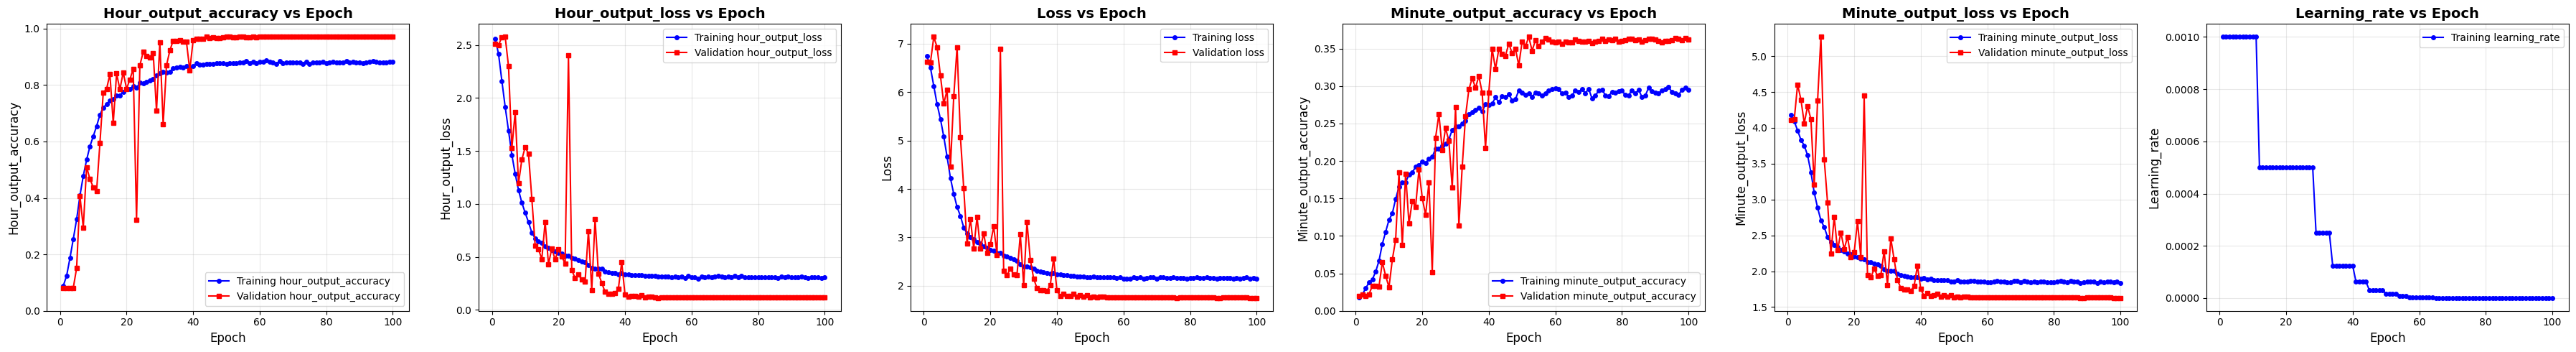

In [ ]:

 

import numpy as np
import tensorflow as tf
from tensorflow import keras
import math

 
IMG_HEIGHT, IMG_WIDTH = 150, 150
EPOCHS = 100
BATCH_SIZE = 128
NUM_HOUR_CLASSES = 12
NUM_MINUTE_CLASSES = 60


total_size = len(np.load(labels_path, mmap_mode='r'))

np.random.seed(42)
shuffled_indices = np.random.permutation(total_size)

train_size = int(0.8 * total_size)
val_size = int(0.1 * total_size)

train_indices = shuffled_indices[:train_size]
val_indices = shuffled_indices[train_size:train_size + val_size]
test_indices = shuffled_indices[train_size + val_size:]

print(f"Dataset splits:")
print(f"Train: {len(train_indices)} samples")
print(f"Val: {len(val_indices)} samples")
print(f"Test: {len(test_indices)} samples")

def multihead_generator(indices, batch_size, repeat=True, shuffle=True):
    """Yields batches using pre-shuffled indices"""
    data = np.load(data_path, mmap_mode='r')
    labels = np.load(labels_path, mmap_mode='r')
    num_samples = len(indices)

    while True:
        batch_indices = indices.copy()
        if shuffle:
            np.random.shuffle(batch_indices)

        for start in range(0, num_samples, batch_size):
            batch_idx = batch_indices[start:start + batch_size]

            x_batch = data[batch_idx].astype('float32') / 255.0
            if len(x_batch.shape) == 3:
                x_batch = np.expand_dims(x_batch, axis=-1)

            y_hour_batch = labels[batch_idx, 0]
            y_minute_batch = labels[batch_idx, 1]

            yield x_batch, (y_hour_batch, y_minute_batch)

        if not repeat:
            break

def build_multihead_dataset(indices, batch_size, repeat=True, shuffle=True):
    """Wraps the generator into a tf.data.Dataset"""
    dataset = tf.data.Dataset.from_generator(
        lambda: multihead_generator(indices, batch_size, repeat, shuffle),
        output_signature=(
            tf.TensorSpec(shape=(None, IMG_HEIGHT, IMG_WIDTH, 1), dtype=tf.float32),
            (
                tf.TensorSpec(shape=(None,), dtype=tf.int64),   
                tf.TensorSpec(shape=(None,), dtype=tf.int64),   
            ),
        ),
    )
    return dataset.prefetch(tf.data.AUTOTUNE)

train_dataset = build_multihead_dataset(train_indices, BATCH_SIZE, repeat=True, shuffle=True)
val_dataset = build_multihead_dataset(val_indices, BATCH_SIZE, repeat=False, shuffle=False)
test_dataset = build_multihead_dataset(test_indices, BATCH_SIZE, repeat=False, shuffle=False)

steps_per_epoch = math.ceil(len(train_indices) / BATCH_SIZE)
val_steps = math.ceil(len(val_indices) / BATCH_SIZE)
test_steps = math.ceil(len(test_indices) / BATCH_SIZE)

inputs = keras.layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 1))

x = keras.layers.Conv2D(64, (3, 3), padding='same')(inputs)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.Conv2D(64, (3, 3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Dropout(0.2)(x)

x = keras.layers.Conv2D(128, (3, 3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.Conv2D(128, (3, 3), padding='same')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Dropout(0.2)(x)

x = keras.layers.Flatten()(x)
x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dropout(0.3)(x)

 
hour_branch = keras.layers.Dense(128, activation='relu')(x)
hour_branch = keras.layers.Dropout(0.3)(hour_branch)
hour_output = keras.layers.Dense(NUM_HOUR_CLASSES, activation='softmax', name='hour_output')(hour_branch)

 
minute_branch = keras.layers.Dense(256, activation='relu')(x)
minute_branch = keras.layers.Dropout(0.3)(minute_branch)
minute_output = keras.layers.Dense(NUM_MINUTE_CLASSES, activation='softmax', name='minute_output')(minute_branch)

model = keras.Model(inputs=inputs, outputs=[hour_output, minute_output])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss={
        'hour_output': 'sparse_categorical_crossentropy',
        'minute_output': 'sparse_categorical_crossentropy'
    },
    metrics={
        'hour_output': 'accuracy',
        'minute_output': 'accuracy'
    }
)

model.summary()


callbacks = [
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-6,
        verbose=1
    ),
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    keras.callbacks.ModelCheckpoint(
        'best_clock_multihead_model.keras',
        monitor='val_hour_output_accuracy',
        save_best_only=True,
        verbose=1,
        mode='max'
    )
]


history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=EPOCHS,
    steps_per_epoch=steps_per_epoch,
    validation_steps=val_steps,
    callbacks=callbacks,
    verbose=1
)

print("\n=== Test Set Evaluation ===")
scores = model.evaluate(test_dataset, steps=test_steps, verbose=1)
print(f'\nTest Results:')
print(f'Overall loss: {scores[0]:.4f}')
print(f'Hour loss: {scores[1]:.4f}')
print(f'Minute loss: {scores[2]:.4f}')
print(f'Hour accuracy: {scores[3]:.4f} ({scores[3]*100:.2f}%)')
print(f'Minute accuracy: {scores[4]:.4f} ({scores[4]*100:.2f}%)')


predictions = model.predict(test_dataset, steps=test_steps)
hour_predictions = predictions[0]
minute_predictions = predictions[1]

pred_hours = np.argmax(hour_predictions, axis=1)
pred_minutes = np.argmax(minute_predictions, axis=1)


true_hours, true_minutes = [], []
for x_batch, (h_batch, m_batch) in test_dataset:
    true_hours.append(h_batch.numpy())
    true_minutes.append(m_batch.numpy())
true_hours = np.concatenate(true_hours)
true_minutes = np.concatenate(true_minutes)


exact_match = np.mean((pred_hours == true_hours) & (pred_minutes == true_minutes))
print(f'Exact match (both correct): {exact_match:.4f} ({exact_match*100:.2f}%)')

def calculate_time_difference_minutes(true_hours, true_minutes, pred_hours, pred_minutes):
    true_total = true_hours * 60 + true_minutes
    pred_total = pred_hours * 60 + pred_minutes
    diff = np.abs(true_total - pred_total)
    diff = np.minimum(diff, 720 - diff)
    return diff

time_diffs = calculate_time_difference_minutes(true_hours, true_minutes, pred_hours, pred_minutes)

avg_error_hours = int(time_diffs.mean() // 60)
avg_error_minutes = int(time_diffs.mean() % 60)
median_error_hours = int(np.median(time_diffs) // 60)
median_error_minutes = int(np.median(time_diffs) % 60)

print(f'\n"Common Sense" Time Difference Accuracy:')
print(f'Average error: {avg_error_hours}h {avg_error_minutes}m')
print(f'Median error: {median_error_hours}h {median_error_minutes}m')
print(f'Std deviation: {time_diffs.std():.2f} minutes')
hour_errors = np.abs(pred_hours - true_hours)
hour_errors = np.minimum(hour_errors, 12 - hour_errors) 
minute_errors = np.abs(pred_minutes - true_minutes)
minute_errors = np.minimum(minute_errors, 60 - minute_errors) 
print(f'Average hour error: {hour_errors.mean():.2f} hours')
print(f'Average minute error: {minute_errors.mean():.2f} minutes')

def plot_learning_curves(history, save_path='learning_curves_multihead.png'):
    """
    Plot training and validation learning curves.
    """

    metrics = [key for key in history.history.keys() if not key.startswith('val_')]


    n_metrics = len(metrics)
    fig, axes = plt.subplots(1, n_metrics, figsize=(6 * n_metrics, 5))
    if n_metrics == 1:
        axes = [axes]

    for idx, metric in enumerate(metrics):
        ax = axes[idx]


        train_values = history.history[metric]
        epochs = range(1, len(train_values) + 1)
        ax.plot(epochs, train_values, 'b-o', label=f'Training {metric}', markersize=4)


        val_metric = f'val_{metric}'
        if val_metric in history.history:
            val_values = history.history[val_metric]
            ax.plot(epochs, val_values, 'r-s', label=f'Validation {metric}', markersize=4)

        ax.set_xlabel('Epoch', fontsize=12)
        ax.set_ylabel(metric.capitalize(), fontsize=12)
        ax.set_title(f'{metric.capitalize()} vs Epoch', fontsize=14, fontweight='bold')
        ax.legend(loc='best')
        ax.grid(True, alpha=0.3)

        #Set y-axis to start from 0 for accuracy metrics
        if 'acc' in metric.lower():
            ax.set_ylim(bottom=0)

    plt.tight_layout()
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    plt.show()

plot_learning_curves(history)

Dataset splits:
Train: 14400 samples
Val: 1800 samples
Test: 1800 samples


/home/przemelates/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 150, 150, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 150, 150, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 150, 150, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 150, 150, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 150, 150, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 75, 75, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 75, 75, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 75, 75, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 75, 75, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 37, 37, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 37, 37, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 86,392,720 (329.56 MB)

 Trainable params: 86,388,368 (329.55 MB)

 Non-trainable params: 4,352 (17.00 KB)

Epoch 1/100


2025-11-07 23:42:49.923445: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3521', 9476 bytes spill stores, 9844 bytes spill loads

2025-11-07 23:42:50.131931: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4502', 10344 bytes spill stores, 10628 bytes spill loads



112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.0013 - loss: 7.0859

2025-11-07 23:43:17.842512: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-07 23:43:18.530269: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4536', 48 bytes spill stores, 48 bytes spill loads



113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.0013 - loss: 7.0848
Epoch 1: val_accuracy improved from None to 0.00111, saving model to best_clock_model.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 42s 288ms/step - accuracy: 0.0017 - loss: 6.9560 - val_accuracy: 0.0011 - val_loss: 14.3977 - learning_rate: 0.0010
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.0088 - loss: 6.2495
Epoch 2: val_accuracy did not improve from 0.00111
113/113 ━━━━━━━━━━━━━━━━━━━━ 23s 203ms/step - accuracy: 0.0121 - loss: 6.1401 - val_accuracy: 5.5556e-04 - val_loss: 23.9472 - learning_rate: 0.0010
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.0287 - loss: 5.4716
Epoch 3: val_accuracy did not improve from 0.00111
113/113 ━━━━━━━━━━━━━━━━━━━━ 23s 204ms/step - accuracy: 0.0282 - loss: 5.4271 - val_accuracy: 0.0011 - val_loss: 27.0137 - learning_rate: 0.0010
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.0593 - loss: 4.8830
Epoch 4: ReduceLROnPlat

2025-11-08 00:09:14.151902: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
/home/przemelates/.local/lib/python3.10/site-packages/keras/src/trainers/epoch_iterator.py:164: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


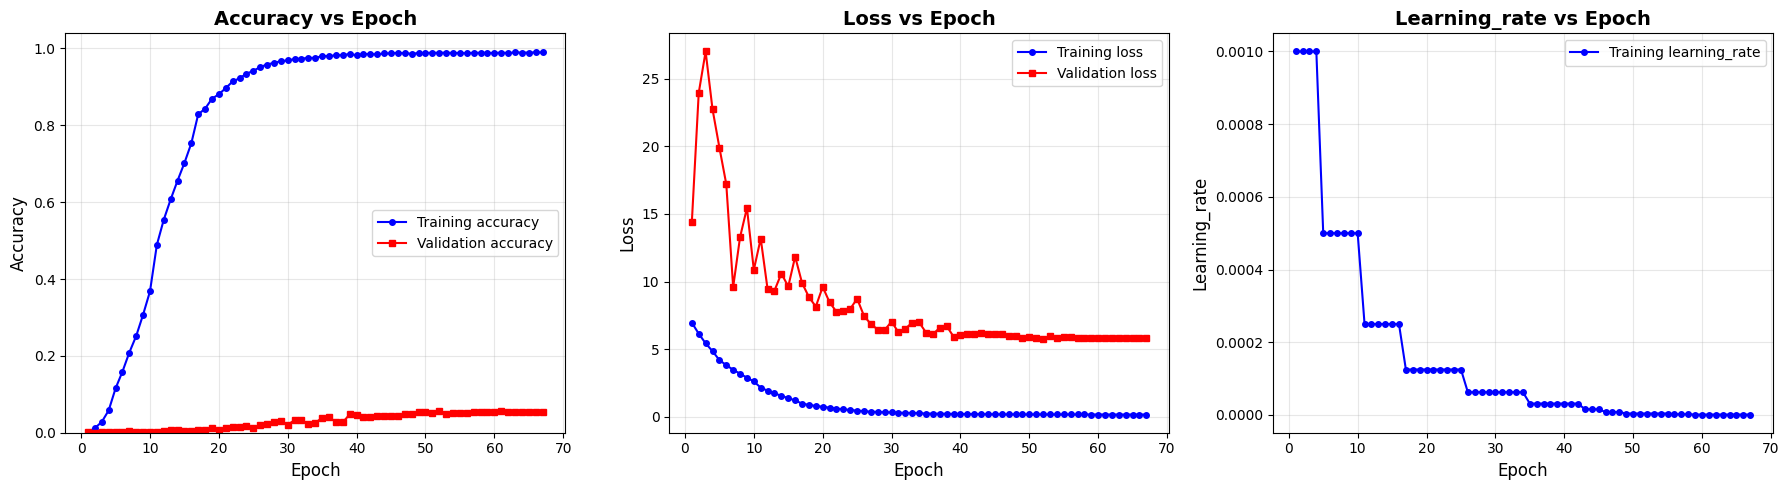

In [ ]:
IMG_HEIGHT, IMG_WIDTH = 150, 150
EPOCHS = 100
BATCH_SIZE = 128
NUM_CLASSES = 720
 
 
 
total_size = len(np.load(labels_path, mmap_mode='r'))

np.random.seed(42)   
shuffled_indices = np.random.permutation(total_size)

train_size = int(0.8 * total_size)
val_size = int(0.1 * total_size)

train_indices = shuffled_indices[:train_size]
val_indices = shuffled_indices[train_size:train_size + val_size]
test_indices = shuffled_indices[train_size + val_size:]

print(f"Dataset splits:")
print(f"Train: {len(train_indices)} samples")
print(f"Val: {len(val_indices)} samples")
print(f"Test: {len(test_indices)} samples")

steps_per_epoch = math.ceil(len(train_indices) / BATCH_SIZE)
val_steps = math.ceil(len(val_indices) / BATCH_SIZE)
test_steps = math.ceil(len(test_indices) / BATCH_SIZE)

def preprocess_image(img):
    img = img.astype('float32') / 255.0
    if len(img.shape) == 2:
        img = np.expand_dims(img, axis=-1)
    return img


def singlehead_generator(indices, batch_size, repeat=True, shuffle=True):
    """Yields batches using pre-shuffled indices"""
    data = np.load(data_path, mmap_mode='r')
    labels = np.load(labels_path, mmap_mode='r')
    num_samples = len(indices)
    while True:
        batch_indices = indices.copy()
        if shuffle:
            np.random.shuffle(batch_indices)

        for start in range(0, num_samples, batch_size):
            batch_idx = batch_indices[start:start + batch_size]

            x_batch = data[batch_idx].astype('float32') / 255.0
            if len(x_batch.shape) == 3:
                x_batch = np.expand_dims(x_batch, axis=-1)


            y_batch = labels[batch_idx, 0] * 60 + labels[batch_idx, 1]

            yield x_batch, y_batch

        if not repeat:
            break


def build_singlehead_dataset(indices, batch_size, repeat=True, shuffle=True):
    dataset = tf.data.Dataset.from_generator(
        lambda: singlehead_generator(indices, batch_size, repeat, shuffle),
        output_signature=(
            tf.TensorSpec(shape=(None, IMG_HEIGHT, IMG_WIDTH, 1), dtype=tf.float32),
            tf.TensorSpec(shape=(None,), dtype=tf.int64)
        )
    )
    return dataset.prefetch(tf.data.AUTOTUNE)

train_dataset = build_singlehead_dataset(train_indices, BATCH_SIZE, repeat=True, shuffle=True)
val_dataset = build_singlehead_dataset(val_indices, BATCH_SIZE, repeat=False, shuffle=False)
test_dataset = build_singlehead_dataset(test_indices, BATCH_SIZE, repeat=False, shuffle=False)

steps_per_epoch = math.ceil(len(train_indices) / BATCH_SIZE)
val_steps = math.ceil(len(val_indices) / BATCH_SIZE)
test_steps = math.ceil(len(test_indices) / BATCH_SIZE)


'''
Model architecture
'''
model = keras.Sequential([

    keras.layers.Conv2D(64, (3, 3), padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Conv2D(64, (3, 3), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128, (3, 3), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Conv2D(128, (3, 3), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(256, (3, 3), padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),

    keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()


callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1),
    keras.callbacks.ModelCheckpoint('best_clock_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)
]


history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    steps_per_epoch=steps_per_epoch,
    validation_steps=val_steps,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=1
)


score = model.evaluate(test_dataset, steps=test_steps, verbose=1)
print(f'\nTest Results:')
print(f'Test loss: {score[0]:.4f}')
print(f'Test accuracy: {score[1]:.4f} ({score[1]*100:.2f}%)')
predictions = model.predict(test_dataset)
pred_classes = np.argmax(predictions, axis=1)


pred_hours = pred_classes // 60
pred_minutes = pred_classes % 60


true_classes = np.concatenate([y for x, y in test_dataset], axis=0)
true_hours = true_classes // 60
true_minutes = true_classes % 60


hour_accuracy = np.mean(pred_hours == true_hours)
minute_accuracy = np.mean(pred_minutes == true_minutes)
exact_match = np.mean(pred_classes == true_classes)

print(f'\nDetailed Accuracy:')
print(f'Hour accuracy: {hour_accuracy:.4f} ({hour_accuracy*100:.2f}%)')
print(f'Minute accuracy: {minute_accuracy:.4f} ({minute_accuracy*100:.2f}%)')
print(f'Exact match (both correct): {exact_match:.4f} ({exact_match*100:.2f}%)')


def calculate_time_difference_minutes(true_hours, true_minutes, pred_hours, pred_minutes):
    """
    Calculate absolute time difference in minutes, handling circular clock arithmetic
    """
    true_total_minutes = true_hours * 60 + true_minutes
    pred_total_minutes = pred_hours * 60 + pred_minutes


    diff = np.abs(true_total_minutes - pred_total_minutes)


    diff = np.minimum(diff, 720 - diff)

    return diff
def format_time_difference(minutes):
    """Convert minutes to 'X hours Y minutes' format"""
    hours = int(minutes // 60)
    mins = int(minutes % 60)
    return hours, mins

time_diffs = calculate_time_difference_minutes(true_hours, true_minutes, pred_hours, pred_minutes)

#Calculate average error in hours and minutes format
avg_error_hours, avg_error_mins = format_time_difference(time_diffs.mean())
median_error_hours, median_error_mins = format_time_difference(np.median(time_diffs))

print(f'\n"Common Sense" Time Difference Accuracy:')
print(f'Average error: {avg_error_hours} hour(s) and {avg_error_mins} minute(s)')
print(f'  (Total: {time_diffs.mean():.2f} minutes)')
print(f'Median error: {median_error_hours} hour(s) and {median_error_mins} minute(s)')
print(f'  (Total: {np.median(time_diffs):.2f} minutes)')
print(f'Std deviation: {time_diffs.std():.2f} minutes')

def plot_learning_curves(history, save_path='learning_curves_720.png'):
    """
    Plot training and validation learning curves.
    """

    metrics = [key for key in history.history.keys() if not key.startswith('val_')]


    n_metrics = len(metrics)
    fig, axes = plt.subplots(1, n_metrics, figsize=(6 * n_metrics, 5))
    if n_metrics == 1:
        axes = [axes]

    for idx, metric in enumerate(metrics):
        ax = axes[idx]

        train_values = history.history[metric]
        epochs = range(1, len(train_values) + 1)
        ax.plot(epochs, train_values, 'b-o', label=f'Training {metric}', markersize=4)

        val_metric = f'val_{metric}'
        if val_metric in history.history:
            val_values = history.history[val_metric]
            ax.plot(epochs, val_values, 'r-s', label=f'Validation {metric}', markersize=4)

        ax.set_xlabel('Epoch', fontsize=12)
        ax.set_ylabel(metric.capitalize(), fontsize=12)
        ax.set_title(f'{metric.capitalize()} vs Epoch', fontsize=14, fontweight='bold')
        ax.legend(loc='best')
        ax.grid(True, alpha=0.3)


        if 'acc' in metric.lower():
            ax.set_ylim(bottom=0)

    plt.tight_layout()
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    plt.show()

plot_learning_curves(history)
